In [20]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [21]:
#Load the DataSet
ChemTrain=loadmat("ChemTrainNew.mat")
XtrainDS=pd.DataFrame(ChemTrain["XtrainDS"])
XtrainDS=XtrainDS.drop(XtrainDS.columns[0],axis=1)
XtrainDS

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,1128.45,79.625,391.7250,46.025,1418.25,1170.000,401.4000,32.725,1477.50,1192.0,...,21.0625,55.5275,32.9175,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.8375
1,1128.45,80.425,393.5250,45.850,1360.50,1166.875,400.6125,33.225,1470.00,1189.0,...,21.0625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3250
2,1128.45,80.200,391.5000,46.400,1394.25,1174.375,401.6250,33.225,1477.50,1196.0,...,21.0625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3250
3,1128.20,80.025,396.0000,47.000,1419.75,1175.625,401.8500,33.225,1479.00,1180.0,...,21.0625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3250
4,1128.20,80.625,396.1125,46.350,1386.75,1171.875,402.1875,33.200,1470.00,1185.0,...,20.5625,55.5275,33.4250,52.225,28.4200,51.1350,48.7375,50.7150,48.4750,29.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,1129.65,81.850,394.3125,54.400,2315.25,1185.625,403.4250,36.700,1590.00,1127.0,...,19.1875,58.0825,28.5075,53.025,25.7775,51.5025,48.3000,51.0125,47.8800,28.9250
4462,1129.65,81.325,396.9000,53.575,2298.00,1182.500,401.4000,35.900,1594.50,1097.5,...,19.1125,58.1700,28.4900,53.025,25.7775,51.5025,48.3000,50.9950,47.8800,28.3000
4463,1129.55,80.700,397.0125,53.525,2265.75,1201.250,402.6375,37.400,1569.00,1120.5,...,19.1125,58.1000,28.6475,53.025,25.4450,51.4150,48.1950,50.8725,47.8800,28.3500
4464,1129.75,81.275,401.6250,54.550,2283.75,1195.625,399.3750,38.225,1567.50,1121.0,...,19.1125,58.1700,28.7175,53.025,25.8300,51.6250,48.4050,51.0475,48.0025,28.4125


In [22]:
YtrainDS=pd.DataFrame(ChemTrain["YtrainDS"])
YtrainDS

,0
0,14.675
1,18.650
2,18.000
3,14.650
4,24.225
...,...
4461,64.875
4462,64.375
4463,67.125
4464,66.175


In [23]:
XtestDS=pd.DataFrame(ChemTrain["XtestDS"])
XtestDS=XtestDS.drop(XtestDS.columns[0],axis=1)
XtestDS

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,1129.75,81.000,391.1625,54.025,2319.00,1183.125,402.3000,37.425,1566.75,1103.0,...,19.1125,58.1525,28.5950,53.025,25.9350,51.6250,48.3000,51.0475,48.0025,28.4125
1,1129.65,81.525,397.3500,53.675,2316.75,1182.500,402.6375,36.675,1576.50,1097.0,...,19.1125,58.1700,28.7175,53.025,25.9350,51.6250,48.3000,51.0475,48.0025,28.3000
2,1129.65,81.525,398.2500,54.100,2298.00,1193.125,402.4125,37.075,1578.00,1169.0,...,19.1125,58.1350,28.6650,53.025,25.9350,51.6250,48.3175,51.0475,48.0025,28.8000
3,1129.15,81.425,393.8625,53.200,2289.75,1189.375,399.1500,36.575,1572.75,1082.0,...,19.0875,57.9950,28.6475,53.025,25.8300,51.6250,48.3175,51.0125,48.0025,28.4500
4,1128.85,81.250,388.5750,53.600,2299.50,1181.875,400.5000,37.025,1576.50,1074.0,...,19.0875,58.2225,28.6475,53.025,25.8300,51.6250,48.3175,51.1175,48.0025,28.3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,1128.15,83.600,387.7875,56.425,2037.75,1132.500,395.6625,38.625,1601.25,1142.0,...,19.3750,60.1475,30.5200,53.500,31.4300,52.1325,50.0850,53.1475,49.4550,29.0000
2967,1127.95,84.425,397.3500,56.150,2112.75,1137.500,406.6875,39.300,1589.25,1108.0,...,19.3750,60.2525,30.5375,53.500,30.3975,52.0275,50.2075,53.4450,50.0675,28.7125
2968,1127.45,83.700,392.0625,54.925,2018.25,1135.000,398.4750,38.350,1599.00,1108.5,...,19.3750,60.1300,30.5200,53.500,30.6250,52.2375,50.1550,53.2875,50.1725,28.7125
2969,1126.50,83.625,391.1625,54.200,2022.00,1131.875,395.3250,38.375,1590.75,1134.5,...,19.3750,60.3050,30.5375,53.625,30.6250,52.2375,50.2775,53.3225,50.1550,28.7000


No handles with labels found to put in legend.


(4466, 2)


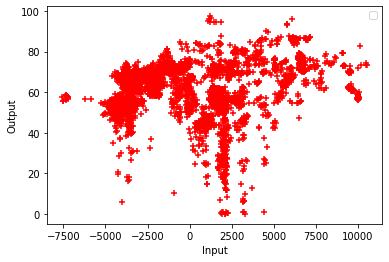

In [32]:
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
XtrainDS=pca.fit_transform(XtrainDS)
print(XtrainDS.shape)
#Plot the values
fig,ax=plt.subplots()
ax.set_xlabel("Input")
ax.set_ylabel("Output")
ax.scatter(XtrainDS[:,0],YtrainDS,color="red",marker="+")
plt.legend()
fig.show()

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions
feature_selection=SelectKBest(score_func=f_regression,k=5)
feature_fit=feature_selection
best_features=feature_fit.fit(XtrainDS,YtrainDS)
set_printoptions(precision=3)
print(feature_fit.scores_)
features=feature_fit.transform(XtrainDS)
print(features[0:5,:])
#Showing the results in DataFrame
dfscores=pd.DataFrame(best_features.scores_)
dfcolums=pd.DataFrame(XtrainDS.columns)
featureScores=pd.concat([dfcolums,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(20,'Score'))

[9.538e+01 6.419e+02 8.846e+02 3.124e-01 2.481e+01 1.407e+02 8.934e+02
 2.466e+03 2.518e+03 1.294e-01 5.971e-01 8.765e+02 5.550e+02 1.084e+02
 6.572e+02 8.612e+02 1.639e+02 9.612e+00 8.004e+02 3.461e+02 7.801e+01
 1.450e+01 3.716e+01 2.409e-02 8.656e+02 2.089e+02 1.171e+01 2.271e+02
 8.850e+02 9.687e+01 8.631e+02 1.877e+00 8.493e+02 8.925e+01 2.406e+02
 9.612e+02 2.627e+02 2.277e-02 3.989e+00 1.050e+02 1.102e-01 3.718e+01
 1.190e+02 1.962e+02 1.687e+02 1.009e+02 1.821e+00 2.321e+02 2.480e+01
 4.250e-01 9.293e-01 4.619e+01 1.144e+02 1.449e+01 6.494e+02 1.261e+02
 6.838e+02 1.052e+01 5.295e+00 2.689e+01 6.182e-01 1.249e+01 1.189e+01
 1.633e+03]
[[ 401.4     32.725 1477.5     74.175   29.837]
 [ 400.613   33.225 1470.      74.175   29.325]
 [ 401.625   33.225 1477.5     74.225   29.325]
 [ 401.85    33.225 1479.      74.075   29.325]
 [ 402.188   33.2   1470.      74.025   29.312]]
    Feature        Score
8         9  2517.760684
7         8  2466.309129
63       64  1633.326685
35      

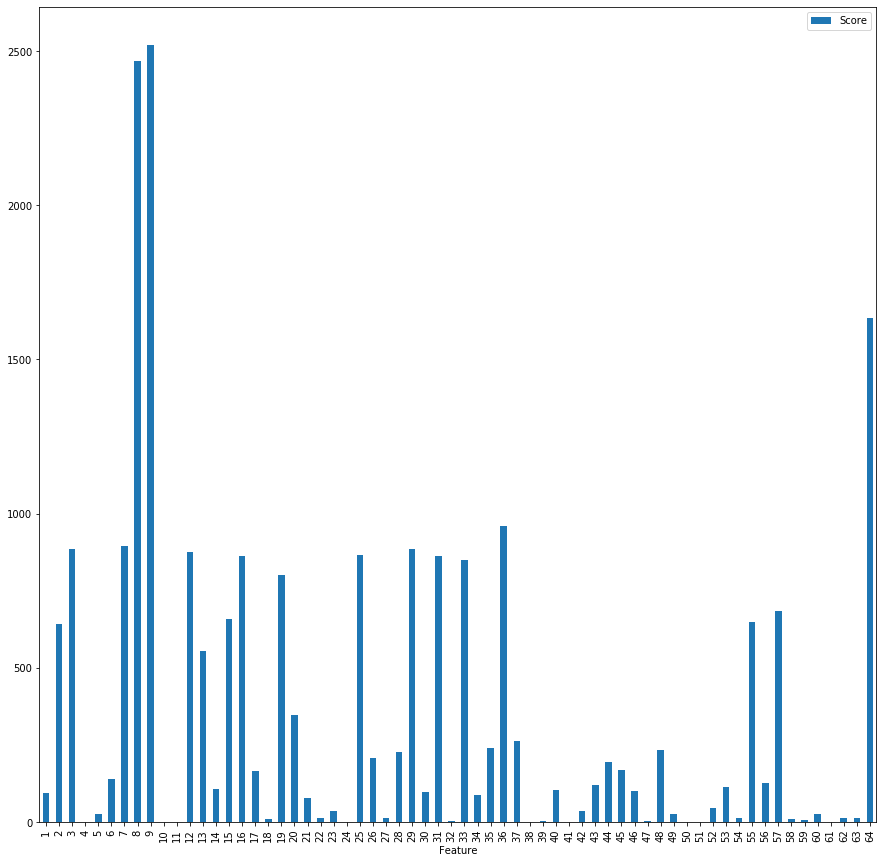

In [6]:
featureScores.plot(x='Feature',y='Score',kind='bar',figsize=(15,15))

In [7]:
XtrainDS=XtrainDS[[9,8,64,36,7,29,3,12,25,31,16,33,19]]
XtrainDS

,9,8,64,36,7,29,3,12,25,31,16,33,19
0,1477.50,32.725,29.8375,74.175,401.4000,89.225,391.7250,397.9125,87.225,88.400,400.2750,78.350,180.6250
1,1470.00,33.225,29.3250,74.175,400.6125,89.250,393.5250,397.6875,86.950,88.400,401.0625,78.275,179.1250
2,1477.50,33.225,29.3250,74.225,401.6250,89.250,391.5000,396.4500,87.125,88.400,399.8250,78.375,181.3125
3,1479.00,33.225,29.3250,74.075,401.8500,89.325,396.0000,398.3625,87.525,88.400,400.2750,78.925,182.8750
4,1470.00,33.200,29.3125,74.025,402.1875,89.225,396.1125,397.5750,87.500,88.425,400.8375,79.150,181.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,1590.00,36.700,28.9250,80.425,403.4250,89.800,394.3125,401.7375,88.175,89.100,410.2875,77.150,102.6250
4462,1594.50,35.900,28.3000,80.350,401.4000,89.800,396.9000,400.2750,88.375,88.775,410.0625,77.525,104.6250
4463,1569.00,37.400,28.3500,78.925,402.6375,89.550,397.0125,399.8250,88.100,88.925,409.9500,79.400,103.6875
4464,1567.50,38.225,28.4125,80.275,399.3750,89.050,401.6250,399.4875,89.050,88.850,410.7375,78.250,103.5625


In [8]:
#Splitting the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(XtrainDS,YtrainDS,test_size=0.3,train_size=0.7,shuffle=True)

In [9]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [11]:
from sklearn.svm import SVR
test=[(KNeighborsRegressor(n_neighbors=10)),(LinearRegression()),(RandomForestRegressor(n_estimators = 500, random_state = 0)),(Ridge(alpha=0.01)),(Lasso(alpha=0.01)),((SVR(kernel='rbf',C=5000,gamma=5000,epsilon=0.01)))]
for model in test: 
    cv_error=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    print('Mean and SD of cross validation',np.mean(cv_error),np.std(cv_error))

Mean and SD of cross validation -30.24550784471246 2.1866996143066464
Mean and SD of cross validation -129.87555440324235 57.41007747210502
Mean and SD of cross validation -21.926860747071995 4.660116713936833
Mean and SD of cross validation -129.25819360342015 56.65421786715146
Mean and SD of cross validation -91.55089291411241 11.402482438830416
Mean and SD of cross validation -159.91051882795657 7.233481416178868


In [12]:
from sklearn import metrics
regressor=KNeighborsRegressor(n_neighbors=10)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.818876865671642
Mean Squared Error: 25.34048851679105
Root Mean Squared Error: 5.033933702065518


In [13]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.0361746196131
Mean Squared Error: 77.94528410761411
Root Mean Squared Error: 8.82866264547548


In [14]:
regressor=SVR(kernel='rbf',C=5000,gamma=5000,epsilon=0.01)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.284910934155077
Mean Squared Error: 154.85867180362408
Root Mean Squared Error: 12.444222426637355


In [15]:
from sklearn import metrics
regressor=RandomForestRegressor(n_estimators = 350, random_state = 0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.791439765458427
Mean Squared Error: 25.191203841532147
Root Mean Squared Error: 5.019083964383555


In [16]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [17]:
parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [18]:
gridF = GridSearchCV(regressor, parameters, cv = 3, verbose = 1, n_jobs = -1)
gridF.fit(X_train, y_train)
print(gridF.best_score_)
print(gridF.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 64.2min finished


0.8536455271648089
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [26]:
regressor=RandomForestRegressor(max_depth=30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7745529932841637
Mean Squared Error: 24.95925253808584
Root Mean Squared Error: 4.995923592098446
